In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
from datetime import date, timedelta
import seaborn as sns
import time


from fund_tools import *

In [2]:
# mpl_fonts = set(f.name for f in FontManager().ttflist)
# matplotlib.rc("font",family='Xingkai')


# print('all font list get from matplotlib.font_manager:')
# for f in sorted(mpl_fonts):
# #     print('\t' + f)

In [2]:
# Set date variable

today = date.today()
first_day_of_the_week = today - timedelta(days=today.weekday())
# end = start + timedelta(days=6)
print("Today: " + str(today))
print("Start: " + str(first_day_of_the_week))
# print("End: " + str(end))

Today: 2021-08-27
Start: 2021-08-23


In [3]:
fund_em_fund_name_df = ak.fund_em_fund_name()
fund_em_fund_name_df

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-偏股,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-偏股,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
13763,970063,HAZQHYLGYCYZQ,华安证券合赢六个月持有债券,债券型-混合债,HUAANZHENGQUANHEYINGLIUGEYUECHIYOUZHAIQUAN
13764,970067,XZZGJQLXFSJHHA,兴证资管金麒麟消费升级混合A,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEA
13765,970068,XZZGJQLXFSJHHB,兴证资管金麒麟消费升级混合B,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEB
13766,970069,XZZGJQLXFSJHHC,兴证资管金麒麟消费升级混合C,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEC


In [6]:
fund_em_open_fund_daily_df = ak.fund_em_open_fund_daily()
fund_em_open_fund_daily_df

,基金代码,基金简称,2021-08-20-单位净值,2021-08-20-累计净值,2021-08-19-单位净值,2021-08-19-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,012079,信达澳银新能源精选混合,1.6340,1.6340,1.5687,1.5687,0.0653,4.16,开放申购,开放赎回,0.15%
1,610004,信达澳银中小盘混合,4.3080,4.3080,4.1450,4.1450,0.1630,3.93,开放申购,开放赎回,0.15%
2,610006,信达澳银产业升级混合,3.5910,4.0610,3.4610,3.9310,0.13,3.76,开放申购,开放赎回,0.15%
3,580009,东吴多策略混合A,2.4644,3.2274,2.3797,3.1427,0.0847,3.56,开放申购,开放赎回,0.15%
4,011949,东吴多策略混合C,2.4590,2.4590,2.3744,2.3744,0.0846,3.56,开放申购,开放赎回,0.00%
...,...,...,...,...,...,...,...,...,...,...,...
11780,012172,工银1-3年国开债指数E,,,,,,,开放申购,开放赎回,0.00%
11781,012687,恒越汇优精选三个月混合(FOF),,,,,,,开放申购,开放赎回,0.10%
11782,012783,鹏华长治稳健养老一年持有期混合(FOF),,,,,,,暂停申购,暂停赎回,0.12%
11783,012386,银河颐年稳健养老一年持有混合(FOF),,,,,,,暂停申购,暂停赎回,0.08%


In [7]:
fund_em_money_fund_info_df = ak.fund_em_money_fund_info(fund="000009")
fund_em_money_fund_info_df

,净值日期,每万份收益,7日年化收益率,申购状态,赎回状态
0,2021-08-21,0.5346,2.0170,开放申购,开放赎回
1,2021-08-20,0.5847,2.0150,开放申购,开放赎回
2,2021-08-19,0.5365,2.0170,开放申购,开放赎回
3,2021-08-18,0.5558,2.0150,开放申购,开放赎回
4,2021-08-17,0.5446,2.0160,开放申购,开放赎回
...,...,...,...,...,...
2897,2013-03-29,0.6744,2.8920,开放申购,开放赎回
2898,2013-03-28,0.7068,3.0420,开放申购,开放赎回
2899,2013-03-27,0.3729,3.1750,开放申购,开放赎回
2900,2013-03-26,0.9561,3.4820,开放申购,开放赎回


In [9]:
open_fund_category = get_fund_categories(open_fund=True)
all_fund_category = get_fund_categories(open_fund=False)

In [10]:
open_fund_category

array(['QDII', '债券型-中短债', '债券型-可转债', '债券型-混合债', '债券型-长债', '商品（不含QDII）',
       '指数型-股票', '混合型-偏债', '混合型-偏股', '混合型-平衡', '混合型-灵活', '股票型'],
      dtype=object)

In [11]:
get_fund_net_worth("008085", first_day_of_the_week, today, fund_category='open')

,净值日期,单位净值,日增长率
0,2021-08-16,1.4483,-4.38
1,2021-08-17,1.4185,-2.06
2,2021-08-18,1.4308,0.87
3,2021-08-19,1.4861,3.86
4,2021-08-20,1.5202,2.29


In [52]:
gp_returnr_week = get_open_fund_rank('股票型', 10, order_by='近1周')
gp_return_week

,序号,基金代码,基金简称,日期,单位净值,累计净值,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,自定义,手续费
564,565,008590,天弘中证全指证券公司ETF联接A,2021-08-20,1.2195,1.2195,-0.02,4.96,5.73,5.70,-0.92,-5.39,,,-5.21,21.95,-5.3918,0.10%
566,567,008591,天弘中证全指证券公司ETF联接C,2021-08-20,1.2153,1.2153,-0.02,4.95,5.72,5.65,-1.02,-5.58,,,-5.33,21.53,-5.5784,0.00%
545,546,502010,易方达中证全指证券公司指数(LOF)A,2021-08-20,1.2925,0.8670,0.05,4.88,5.96,5.68,-0.62,-5.31,29.57,70.23,-5.01,-11.61,-5.3114,0.10%
512,513,160419,华安中证全指证券公司指数,2021-08-20,1.1565,0.7788,0.03,4.87,5.98,6.34,0.14,-4.10,31.01,74.10,-4.58,-22.12,-4.0981,0.12%
1660,1661,012874,易方达中证全指证券公司指数(LOF)C,2021-08-20,1.2921,1.2921,0.05,4.86,5.94,,,,,,,5.65,5.650041,0.00%
595,596,161720,招商中证全指证券公司指数(LOF),2021-08-20,1.1967,0.7563,0.05,4.84,5.67,5.21,-1.69,-8.27,19.27,54.78,-6.31,-29.41,-8.2676,0.10%
1520,1521,012044,鹏华券商C,2021-08-20,1.1070,1.1070,0.09,4.83,5.73,5.63,,,,,,10.70,10.7,0.00%
576,577,161027,富国中证全指证券公司指数(LOF)A,2021-08-20,1.0710,0.6420,0,4.79,5.62,5.31,-1.29,-7.26,20.53,63.73,-5.72,-32.25,-7.2601,0.12%
607,608,004069,南方中证全指证券公司ETF联接A,2021-08-20,1.1859,1.1859,0.04,4.78,5.51,5,-1.92,-8.03,24.04,66.33,-6.56,18.59,-8.0270,0.12%
581,582,160633,鹏华券商A,2021-08-20,1.1420,0.6590,0,4.77,5.64,5.55,-1.38,-7.58,25.20,66.85,-6.16,-30.62,-7.5781,0.12%


In [12]:
fund_category_list = np.unique(current_open_fund_mergered()['基金大类'].values)
fund_category_list

array(['QDII', '债券型', '商品（不含QDII）', '指数型', '混合型', '股票型'], dtype=object)

In [14]:
rank_df = get_open_fund_rank(fund_category_list[1], rank=5, order_by='近1周')
rank_df

,序号,基金代码,基金简称,日期,单位净值,累计净值,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,自定义,手续费
158,159,007942,恒生前海恒扬纯债债券C,2021-08-20,1.1236,1.1236,-0.12,3.39,3.82,3.60,4.95,6.02,,,4.98,12.36,6.0400,0.00%
106,107,007941,恒生前海恒扬纯债债券A,2021-08-20,1.1309,1.1309,-0.11,3.34,3.81,4.56,6.03,7.33,,,6.12,13.09,7.3469,0.08%
1560,1561,003254,前海开源鼎裕债券A,2021-08-20,1.2379,1.9879,-0.14,1.15,1.86,0.79,1.19,2.10,4.80,89.03,2.43,101.13,1.7485,0.08%
1605,1606,003255,前海开源鼎裕债券C,2021-08-20,1.2565,2.0065,-0.14,1.14,1.82,0.69,0.98,2.18,4.45,86.37,2.53,102.94,1.8193,0.00%
100,101,007819,华泰紫金丰益中短债A,2021-08-20,1.0376,1.0376,0.01,0.84,2.06,4.20,6.21,-0.64,,,5.99,3.76,-0.6321,0.03%


Text(0.5, 0, '%')

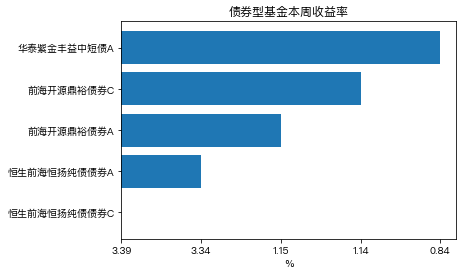

In [15]:
plt.barh(rank_df['基金简称'], rank_df['近1周'])
figtitle = fund_category_list[1] + '基金' + r'本周收益率'
plt.title(figtitle)
plt.xlabel('%')
# plt.xlim([0,10])

In [17]:
def plot_category_rank(start_date, end_date, rank, order_by, open_fund=True):
    
    if open_fund:
        fund_category_list = np.unique(current_open_fund_mergered()['基金大类'].values)
        
        for i in range(len(fund_category_list)):
            rank_df = get_open_fund_rank(fund_category_list[i], rank=rank, order_by=order_by)
            time.sleep(2)

            plt.barh(rank_df['基金简称'], rank_df[order_by])
            figtitle = fund_category_list[i] + '基金' + r'本周收益率'
            plt.title(figtitle)
            plt.xlabel('%')

In [18]:
def get_open_fund_rank(category, rank, order_by, ascending=False):

    """
    :param category: string, input ['股票型','混合型',"指数型",'QDII','LOF','FOF']
    :param rank: int, return how many rows of the dataframe
    :param order_by: string, input ['近1周', '近1月', '近3月',
       '近6月', '近1年', '近2年', '近3年']
    :param ascending: bool, default False
    :return: dataframe, with specific sorted dataframe
    """

    if category == '股票型':
        df = ak.fund_em_open_fund_rank(symbol="股票型").sort_values(by=[order_by], ascending=ascending)
    elif category == '混合型':
        df = ak.fund_em_open_fund_rank(symbol="混合型").sort_values(by=[order_by], ascending=ascending)
    elif category == '债券型':
        df = ak.fund_em_open_fund_rank(symbol="债券型").sort_values(by=[order_by], ascending=ascending)
    elif category == "指数型":
        df = ak.fund_em_open_fund_rank(symbol="指数型").sort_values(by=[order_by], ascending=ascending)
    elif category == 'QDII':
        df = ak.fund_em_open_fund_rank(symbol="QDII").sort_values(by=[order_by], ascending=ascending)
    elif category == 'LOF':
        df = ak.fund_em_open_fund_rank(symbol="LOF").sort_values(by=[order_by], ascending=ascending)
    elif category == 'FOF':
        df = ak.fund_em_open_fund_rank(symbol="FOF").sort_values(by=[order_by], ascending=ascending)

    return df.head(rank)

UnboundLocalError: local variable 'df' referenced before assignment

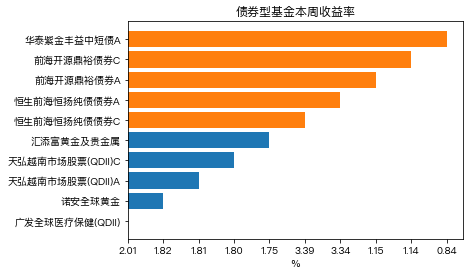

In [19]:
plot_category_rank(first_day_of_the_week, today, 5, order_by='近1周')

In [65]:
return_week = get_open_fund_rank('混合型-偏债', 10, order_by='近1周')
plt.barh(return_week['基金简称'], return_week['近1周'])
plt.title(r'本周收益率')

UnboundLocalError: local variable 'df' referenced before assignment

### 申万一级行业

In [8]:
sw_index_spot_df = ak.sw_index_spot()
sw_index_spot_df

,指数代码,指数名称,昨收盘,今开盘,成交额,最高价,最低价,最新价,成交量
0,801010,农林牧渔,3167.83,3160.88,13047227621.00,3160.88,3094.44,3132.72,1134015142
1,801020,采掘,3150.09,3135.32,25513332082.00,3149.86,3087.16,3143.58,2705606042
2,801030,化工,4889.19,4862.48,126240995658.00,4914.64,4800.22,4909.56,7084124832
3,801040,钢铁,3277.76,3260.20,15160813442.00,3329.41,3237.43,3325.18,2973552363
4,801050,有色金属,5884.11,5837.84,104985307634.00,5926.08,5779.83,5913.38,5950204637
5,801080,电子,5205.77,5194.82,114137642848.00,5259.62,5157.43,5217.41,5359504258
6,801110,家用电器,8336.36,8274.60,14300163824.00,8318.58,8097.46,8261.29,846333984
7,801120,食品饮料,23578.94,22848.55,70152233155.00,23081.94,22210.52,22390.49,1170887314
8,801130,纺织服装,1779.51,1780.27,6926577309.00,1780.41,1751.33,1765.92,899233137
9,801140,轻工制造,2661.51,2658.68,15128897753.00,2658.68,2602.78,2626.39,1321702721


In [9]:
sw_index_df = ak.sw_index_cons(index_code="801010")
sw_index_df

,stock_code,stock_name,start_date,weight
0,000048,京基智农,2011-10-10 00:00:00,0.4421
1,000505,京粮控股,2018-07-16 00:00:00,0.3110
2,000592,平潭发展,2015-11-03 00:00:00,0.7361
3,000702,正虹科技,2008-06-02 00:00:00,0.1443
4,000713,丰乐种业,2008-06-02 00:00:00,0.5825
...,...,...,...,...
88,603718,海利生物,2016-02-05 00:00:00,0.6054
89,603739,蔚蓝生物,2019-01-04 10:00:00,0.2840
90,605016,百龙创园,2021-04-21 00:00:00,0.1594
91,605198,德利股份,2020-09-18 00:00:00,0.0640


In [10]:
sw_index_df = ak.sw_index_daily(index_code="801010", start_date="2021-08-09", end_date="2021-08-13")
sw_index_df.reset_index().drop('index', axis=1)

,index_code,index_name,date,open,high,low,close,vol,amount,change_pct
0,801010,农林牧渔,2021-08-13,3296.48,3318.88,3265.76,3311.39,16.24,198.00,0.40
1,801010,农林牧渔,2021-08-12,3355.04,3358.27,3293.19,3298.08,14.56,189.91,-1.02
2,801010,农林牧渔,2021-08-11,3324.98,3346.65,3311.16,3331.99,14.82,189.91,-0.41
3,801010,农林牧渔,2021-08-10,3313.78,3356.66,3270.34,3345.69,16.43,235.45,0.90
4,801010,农林牧渔,2021-08-09,3186.31,3319.51,3186.31,3315.81,17.16,239.47,4.09


In [11]:
sw_index_df = ak.sw_index_daily_indicator(index_code="801760", start_date="2019-12-01", end_date="2019-12-07", data_type="Day")
sw_index_df

,index_code,index_name,date,close,volume,chg_pct,turn_rate,pe,pb,vwap,float_mv,avg_float_mv,dividend_yield_ratio,turnover_pct
0,801760,传媒,2019-12-06,629.75,30.95,1.66,2.0396,38.49,2.22,14.87,"12,025.11",71.58,0.77,6.18
1,801760,传媒,2019-12-05,619.46,22.51,1.07,1.4834,37.88,2.18,14.67,"11,818.01",70.35,0.79,4.57
2,801760,传媒,2019-12-04,612.92,20.06,-0.11,1.3219,37.49,2.16,14.45,"11,703.94",69.67,0.79,4.74
3,801760,传媒,2019-12-03,613.60,21.26,0.01,1.4011,37.55,2.16,14.46,"11,704.71",69.67,0.79,4.85
4,801760,传媒,2019-12-02,613.56,22.82,0.86,1.5061,37.53,2.16,14.49,"11,693.51",69.60,0.79,5.05


In [12]:
industry_list = sw_index_spot_df['指数名称'].values
industry_list

array(['农林牧渔', '采掘', '化工', '钢铁', '有色金属', '电子', '家用电器', '食品饮料', '纺织服装',
       '轻工制造', '医药生物', '公用事业', '交通运输', '房地产', '商业贸易', '休闲服务', '综合',
       '建筑材料', '建筑装饰', '电气设备', '国防军工', '计算机', '传媒', '通信', '银行', '非银金融',
       '汽车', '机械设备'], dtype=object)

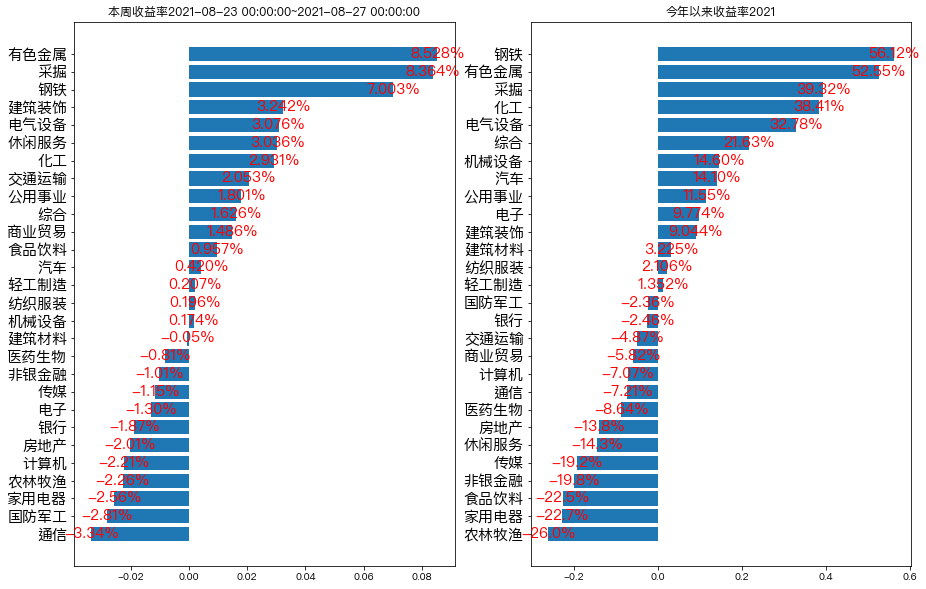

In [5]:
industry_return_df = sw_industry_return_plot(start_date=first_day_of_the_week, end_date=today, save_pic=True)

### 大类资产表现

In [25]:
stock_zh_index_spot_df = ak.stock_zh_index_spot()
stock_zh_index_spot_df
stock_zh_index_spot_df['名称'].values

100%|██████████| 8/8 [00:02<00:00,  3.40it/s]


,代码,名称,最新价,涨跌额,涨跌幅,昨收,今开,最高,最低,成交量,成交额
0,sh000001,上证指数,3427.3338,-38.221,-1.103,3465.5546,3442.5062,3453.1531,3394.9723,391136918,552667602552
1,sh000002,Ａ股指数,3592.0335,-40.105,-1.104,3632.1386,3607.9423,3619.1310,3558.0948,390757221,552427146693
2,sh000003,Ｂ股指数,261.7364,-0.808,-0.308,262.5449,262.5704,262.7593,260.0371,371129,185958220
3,sh000004,工业指数,3216.7389,-44.666,-1.370,3261.4053,3231.4570,3246.7884,3180.9718,223933412,392617057931
4,sh000005,商业指数,2870.3794,-23.966,-0.828,2894.3452,2887.9696,2891.3294,2842.6403,22893088,26604980909
...,...,...,...,...,...,...,...,...,...,...,...
581,sz988006,,3353.3650,-92.051,-2.672,3445.4160,3422.7220,3429.4640,3319.5040,2124570979,124835653225
582,sz988007,,3351.8130,-90.605,-2.632,3442.4180,3420.7930,3427.2720,3318.0260,2124570979,16025283196
583,sz988106,,3571.9410,-98.052,-2.672,3669.9930,3645.8200,3653.0010,3535.8740,2124570979,124835653225
584,sz988107,,3570.2750,-96.511,-2.632,3666.7860,3643.7520,3650.6530,3534.2870,2124570979,16025283196


In [ ]:
important_index = ['沪深300', '中证500', '创业板指', '中小综指']

In [30]:
index_investing_global_df = ak.index_investing_global(country="美国", index_name="标普500指数", period="每月", start_date="20210816", end_date="20210820")

AttributeError: 'NoneType' object has no attribute 'find_all'

In [15]:
get_index_price('sh000001', start_date='2021-07-01', end_date='2021-08-18')

,open,high,low,close,volume
date,,,,,
2021-07-01,3600.546,3607.705,3573.937,3588.782,2.918832e+10
2021-07-02,3569.892,3569.892,3514.339,3518.760,2.919455e+10
2021-07-05,3516.923,3534.322,3510.578,3534.322,2.880948e+10
2021-07-06,3533.130,3538.347,3496.928,3530.259,3.140702e+10
2021-07-07,3508.590,3557.879,3504.472,3553.716,3.188392e+10
2021-07-08,3557.218,3558.677,3521.058,3525.504,3.508779e+10
2021-07-09,3512.233,3529.310,3485.054,3524.088,3.498843e+10
2021-07-12,3545.198,3565.032,3527.393,3547.836,4.036396e+10
2021-07-13,3547.590,3567.481,3542.815,3566.523,3.624167e+10


In [17]:
index_vix_df = ak.index_vix(start_date="20210801", end_date="20210820")
index_vix_df

,开盘价,当前价,涨跌,涨跌幅
2021-08-02 15:20,18.24,18.13,-0.11,-0.60
2021-08-02 15:21,18.24,18.16,-0.08,-0.44
2021-08-02 15:22,18.24,18.13,-0.11,-0.60
2021-08-02 15:23,18.24,18.12,-0.12,-0.66
2021-08-02 15:24,18.24,18.12,-0.12,-0.66
...,...,...,...,...
2021-08-16 16:20,15.43,16.73,1.30,8.43
2021-08-16 16:21,15.43,16.72,1.29,8.36
2021-08-16 16:22,15.43,16.74,1.31,8.49
2021-08-16 16:23,15.43,16.80,1.37,8.88
